# Football Coach pay data Analysis
In this notebook I will analyze data on the pays of coaches of FBS football coaches. I will look at the relationship between how much a head coach of a team is paid and the total pay of all the assistant coaches on the team. 
Data found at https://sports.usatoday.com/ncaa/salaries/football/coach

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [11]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQmayUA3uJDXekrPDHrsXO-QRLXZAdu2Pc7zQTYlRJRxjUlp5Rm0W9cE28D_4Sv9zxdblaIKTxBOjn2/pub?gid=1684945782&single=true&output=csv')

In [12]:
df.School_Pay = pd.to_numeric(df.School_Pay, errors='coerce')
df.Total_Pay = pd.to_numeric(df.Total_Pay, errors='coerce')
df.Max_Bonus = pd.to_numeric(df.Max_Bonus, errors='coerce')
df.Bonuses_Paid = pd.to_numeric(df.Bonuses_Paid, errors='coerce')
df.Asst_Pay_total = pd.to_numeric(df.Asst_Pay_total, errors='coerce')

In [13]:
df.dtypes

Rank                int64
School             object
Conference         object
Coach              object
School_Pay        float64
Total_Pay         float64
Max_Bonus         float64
Bonuses_Paid      float64
Asst_Pay_total      int64
School_Buyout      object
dtype: object

In [14]:
dfpays = df[['School_Pay', 'Asst_Pay_total']]

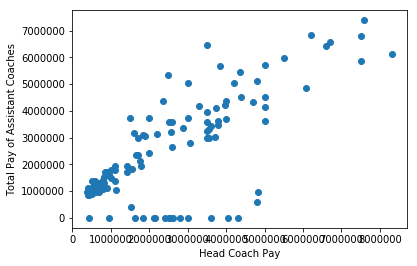

,School_Pay,Asst_Pay_total
School_Pay,1.000000,0.743799
Asst_Pay_total,0.743799,1.000000


In [15]:
plt.scatter(dfpays.School_Pay, dfpays.Asst_Pay_total)
plt.xlabel('Head Coach Pay')
plt.ylabel('Total Pay of Assistant Coaches')
plt.show()
dfpays.corr()

This plot looks pretty correlated, and has an r value of 0.744. However, there are several outlier points where assistants don't make any money. I think that these schools should be taken out, as they seem to be an exception to most of the data, and the schools who don't pay their assistants don't base this on how much their head coach is paid. 

In [16]:
dfpays = dfpays[dfpays.Asst_Pay_total > 0]

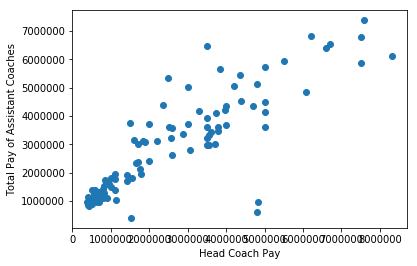

,School_Pay,Asst_Pay_total
School_Pay,1.000000,0.868372
Asst_Pay_total,0.868372,1.000000


In [17]:
plt.scatter(dfpays.School_Pay, dfpays.Asst_Pay_total)
plt.xlabel('Head Coach Pay')
plt.ylabel('Total Pay of Assistant Coaches')
plt.show()
dfpays.corr()

Overall, there are still about three outlier points, but the data still apears very linear and has an R-value of 0.868. This means that there is a correlation between how much a school pays its head football coach and how much a school pays all of its assistance coaches. this makes sense, because huge football schools like Alabama are probably willing to shell out a ton of money to both Nick Saban and all of their assistant coaches because of how large their budgets. The bigger the budget, the more the head coach and the assistant coaches get paid, as seen in this graph. 